# Exercise 1:

In [54]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.special import gamma
%matplotlib notebook

In [55]:
healthclaims = np.loadtxt("clms.txt")

In [56]:
meanhc = np.mean(healthclaims)
medianhc = np.median(healthclaims)
maxhc = np.max(healthclaims)
minhc = np.min(healthclaims)
stdhc = np.std(healthclaims)
print("Mean Health Claim:    ", meanhc)
print("Median Health Claim:  ", medianhc)
print("Standard deviation:   ", stdhc)
print("Minimum Health Claim: ", minhc)
print("Maximum Health Claim: ", maxhc)

Mean Health Claim:     720.2779753272437
Median Health Claim:   172.21
Standard deviation:    3972.663756393663
Minimum Health Claim:  0.01
Maximum Health Claim:  227967.25


<IPython.core.display.Javascript object>


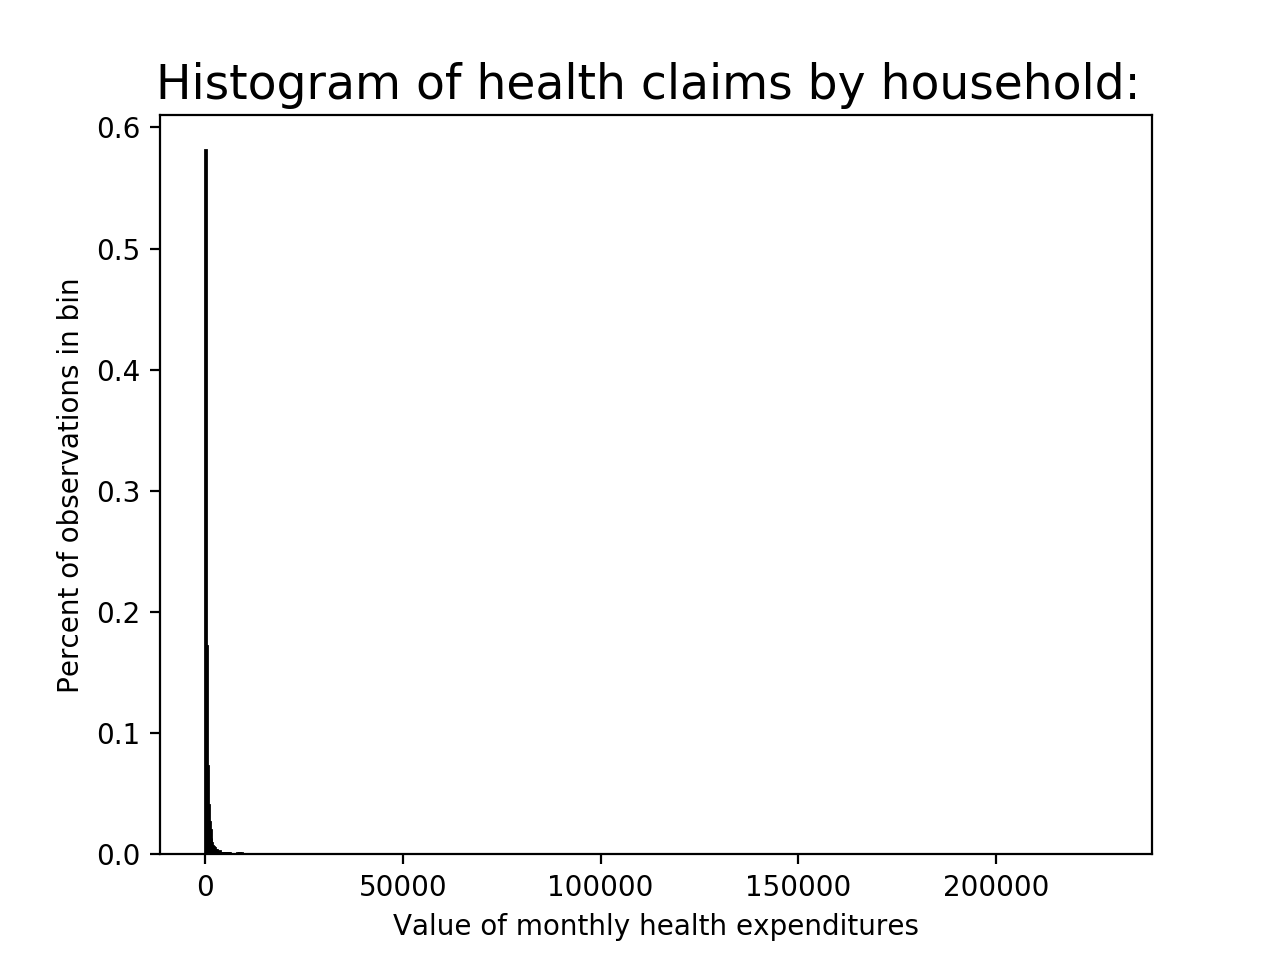

1.0000000000000322


In [57]:
num_bins = 1000
weights = (1 / len(healthclaims)) * np.ones_like(healthclaims)
n, bin_cuts, patches = plt.hist(healthclaims, num_bins, weights=weights, edgecolor='k')
print(n.sum())

#plt.xticks(np.round_(bin_cuts, 1))
plt.title('Histogram of health claims by household: ', fontsize=17)
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.show()


In [75]:
def plotfun():
    num_bins = 100
    weights = (1 / len(healthclaims)) * np.ones_like(healthclaims)
    n, bin_cuts, patches = plt.hist(healthclaims, num_bins, range=(0, 800), weights=weights, edgecolor='k')
    plt.xticks(np.round_(bin_cuts, 1))
    plt.title('Histogram of health claims by household: ', fontsize=17)
    plt.xlabel(r'Value of monthly health expenditures')
    plt.ylabel(r'Percent of observations in bin')
    print(n.sum())

plotfun()
plt.show()

0.8494208494208465


Text on the graphs


#### b)

In [96]:
# Define log likelihood function for the normal distribution
def log_lik_gamma(xvals, alpha, beta):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given gamma
    distribution parameters alpha and beta.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    alpha   = 
    beta   = 

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    #newxvals = (xvals )/ (1 / beta)
    #pdf_vals = stats.gamma.pdf(newxvals, a=alpha) / (1 / beta)
    #pdf_vals = np.empty(len(xvals))
    #for i in xvals:
    #    pdf_vals[i] = ((beta**alpha)/math.gamma(alpha))*(xvals[i]**(alpha-1))*(np.exp(-(xvals[i] * beta)))
    pdf_vals = stats.gamma.pdf(xvals, a=alpha, scale=(1 / beta))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

#print('Log-likelihood 1: ', log_lik_norm(pts, mu_1, sig_1))
#print('Log-likelihood 2: ', log_lik_norm(pts, mu_2, sig_2))

In [97]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:

    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    alpha, beta = params
    xvals = args
    #T = len(xvals)
    #log_lik_val = -T * alpha * np.log(beta) + (alpha - 1) * np.sum(np.log(xvals)) - \
    #    (1 / beta) * np.sum(xvals) - T * math.gamma(alpha)
    
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [98]:
beta_0 = np.var(healthclaims) / meanhc
alpha_0 = meanhc / beta_0
params_0 = np.array([alpha_0, beta_0])
output = opt.minimize(crit, params_0, args=healthclaims)
alpha_MLE, beta_MLE = output.x
loglikeval = -output.fun
print("MLE Alpha: ", alpha_MLE)
print("MLE Beta:  ", beta_MLE)
print("Log likelihood function: ", loglikeval)

MLE Alpha:  0.032872796694206986
MLE Beta:   21911.064702753894
Log likelihood function:  -inf


/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [90]:
output

      fun: nan
 hess_inv: array([[ 2.79476192e-05, -2.61549380e+00],
       [-2.61549380e+00,  2.48863684e+05]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 532
      nit: 19
     njev: 133
   status: 2
  success: False
        x: array([ 2.83034382e+01, -2.71064668e+06])

<IPython.core.display.Javascript object>


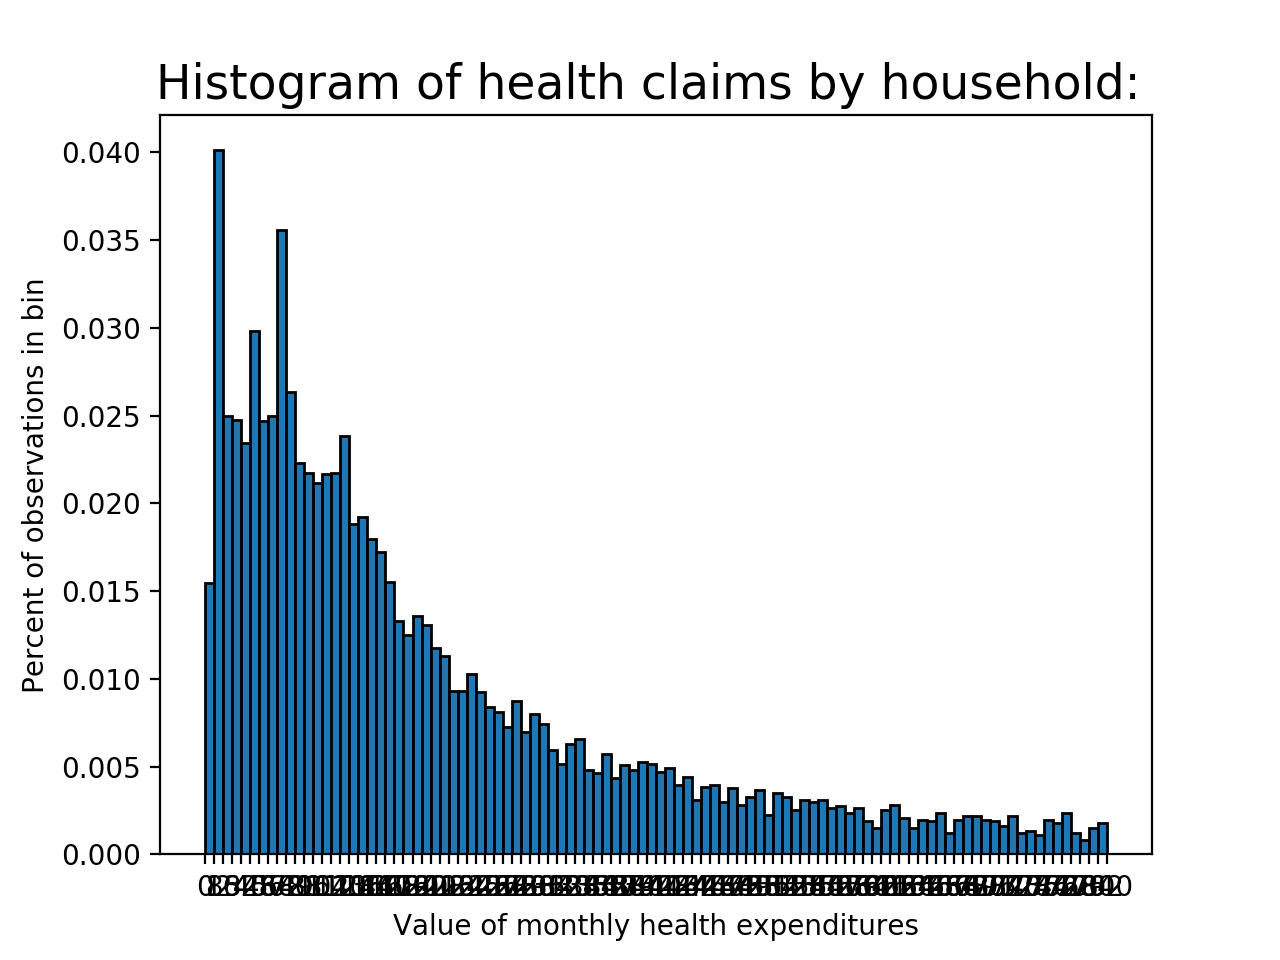

0.8494208494208465


In [93]:
xvals = np.linspace(0, 800, 100)
plotfun()
plt.plot(xvals, stats.gamma.pdf(xvals, a=alpha_MLE, scale=(1 / beta_MLE)), 
         linewidth=2, color='k', label='3: $\alpha$=5,$\beta$=5')
plt.show()

In [94]:
stats.gamma.pdf(xvals, a=alpha_MLE, scale=(beta_MLE))

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [52]:
plt.plot(xvals, stats.gamma.pdf(xvals, a=alpha_MLE, scale=(1 / beta_MLE)))
plt.title('Histogram of health claims by household: ', fontsize=17)
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in bin')


Text(49.5694,0.5,'Percent of observations in bin')

### Exercise 2

In [103]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [113]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.special import gamma
import pandas as pd

In [114]:
data = pd.read_csv("MacroSeries.txt", header=None)
data.head()

,0,1,2,3,4
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


In [115]:
data.columns = ['ct', 'kt', 'wt', 'rt', 'yt']


,ct,kt,wt,rt,yt
0,1.128323e+07,8.040697e+06,1.120211e+07,1.008852,1.931398e+07
1,1.215464e+07,8.030754e+06,1.206726e+07,1.088112,2.080561e+07
2,1.097303e+07,8.650974e+06,1.089414e+07,0.911904,1.878300e+07
3,9.711635e+06,7.809971e+06,9.641815e+06,0.893986,1.662382e+07
4,9.245673e+06,6.912184e+06,9.179203e+06,0.961637,1.582621e+07


In [116]:
beta = 0.99
#z_0 = mu
alphaguess = .5
rhoguess = 0
muguess = 2
sigma = 2

In [ ]:
def crit(params, *args):
    alpha, rho, mu, sigma = params
    wt, kt = args
    z = np.
    wt - (1 - alpha)*e **zt * (kt) **(alpha - 1)
    zt = rho*ztm1 + (1-rho)*mu + eps